  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card   05/08/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash   09/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  
invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object
gender
Female    

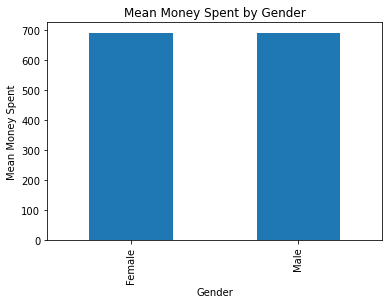

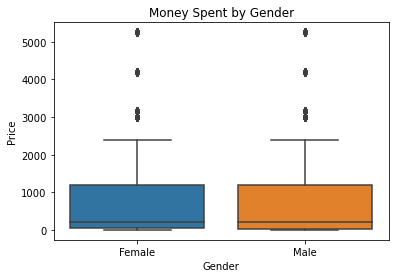

637 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [6]:
%%timeit -n 1 -r 1

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Istanbul_shopping.csv')
print(df.head())

# print the data types
print(df.dtypes)

# Group the data by gender and calculate the mean money spent
grouped = df.groupby('gender')['price'].mean()
print(grouped)

# Plot the data
grouped.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Mean Money Spent')
plt.title('Mean Money Spent by Gender')
plt.show()

# Create a boxplot
sns.boxplot(x='gender', y='price', data=df)

# Set the title and axes labels
plt.title('Money Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Price')

# Show the plot
plt.show()

In [5]:
%%timeit -n 1 -r 1
# Naive Bayes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Load the data
df = pd.read_csv('Istanbul_shopping.csv')

# Prepare the data
X = df[['age', 'quantity', 'price', 'category']]
#X = df[['age', 'quantity', 'price', 'payment_method']]

y = df['gender']
X = pd.get_dummies(X, columns=['category']) # One-hot encoding for categorical features
#X = pd.get_dummies(X, columns=['payment_method']) # One-hot encoding for categorical features

# Data cleaning
df = df.dropna()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Female')
recall = recall_score(y_test, y_pred, pos_label='Female')
f1 = f1_score(y_test, y_pred, pos_label='Female')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("Naive Bayes")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print('tn, fp, fn, tp:', tn, fp, fn, tp)

Naive Bayes
Accuracy: 0.5857128493866881
Precision: 0.5939586645468998
Recall: 0.9508780860269789
F1 Score: 0.7311870045992758
Confusion Matrix:
 [[11208   579]
 [ 7662   443]]
tn, fp, fn, tp: 11208 579 7662 443
828 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [7]:
%%timeit -n 1 -r 1
# Decision Tree Classifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the data
df = pd.read_csv('Istanbul_shopping.csv')

# Prepare the data
X = df[['age', 'category', 'quantity', 'price']]
y = df['gender']
X = pd.get_dummies(X, columns=['category']) # One-hot encoding for categorical features

# Data cleaning
df = df.dropna()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Female')
recall = recall_score(y_test, y_pred, pos_label='Female')
f1 = f1_score(y_test, y_pred, pos_label='Female')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("Decision Tree Classifier:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print('tn, fp, fn, tp:', tn, fp, fn, tp)

Decision Tree Classifier:
Accuracy: 0.581138145988337
Precision: 0.5942598352158018
Recall: 0.923984050224824
F1 Score: 0.7233180580460916
tn, fp, fn, tp: 10891 896 7436 669
882 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
%%timeit -n 1 -r 1
# SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load the data
df = pd.read_csv('Istanbul_shopping.csv')

# Prepare the data
X = df[['age', 'category', 'quantity', 'price']]
y = df['gender']
X = pd.get_dummies(X, columns=['category']) # One-hot encoding for categorical features

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the SVM pipeline
svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=10, gamma=0.1))

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
if 'female' in y_test.unique():
    pos_label = 'female'
else:
    pos_label = y_test.unique()[0]
precision = precision_score(y_test, y_pred, pos_label=pos_label)
recall = recall_score(y_test, y_pred, pos_label=pos_label)
f1 = f1_score(y_test, y_pred, pos_label=pos_label)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("SVM")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print('tn, fp, fn, tp:', tn, fp, fn, tp)


SVM
Accuracy: 0.5925497687512568
Precision: 0.5925497687512568
Recall: 1.0
F1 Score: 0.744152277534013
tn, fp, fn, tp: 11787 0 8105 0
7min 42s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
